# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.307209e+01     1.365174e+01
 * time: 0.004479885101318359
     1     6.186124e+01     9.566672e+00
 * time: 0.01281285285949707
     2     5.539702e+01     1.171991e+01
 * time: 0.0315098762512207
     3     3.900792e+01     7.685071e+00
 * time: 0.14907479286193848
     4     2.819842e+01     7.300031e+00
 * time: 0.1753098964691162
     5     2.113399e+01     5.526182e+00
 * time: 0.196943998336792
     6     2.003810e+01     6.206306e+00
 * time: 0.21517682075500488
     7     9.483755e+00     2.952314e+00
 * time: 0.2328639030456543
     8     7.422209e+00     2.845324e+00
 * time: 0.2510190010070801
     9     6.262670e+00     2.606256e+00
 * time: 0.2689938545227051
    10     5.939147e+00     1.774292e+00
 * time: 0.28374195098876953
    11     5.728523e+00     1.027983e+00
 * time: 0.35936999320983887
    12     5.545766e+00     1.110535e+00
 * time: 0.3741278648376465
    13     5.375774e+00     1.082217e+00
 * time: 0.3891

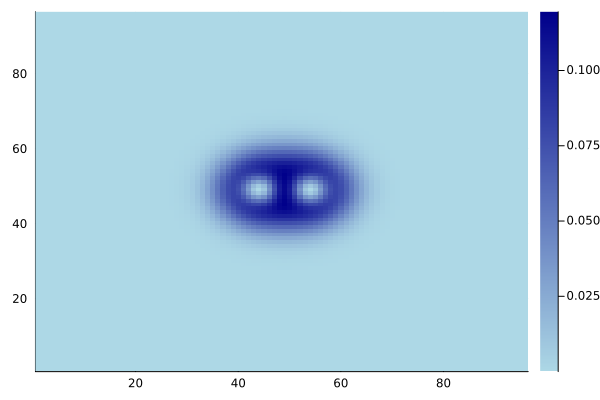

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)